# Problem statement

banknote authentication Data Set

Number of Instances:  1372
Number of Attributes:  5

Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)

Target:

5. class (integer)

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Read dataset for exploratory analysis

In [2]:
# Define the column headers

columns = ['variance','skewness','curtosis','entropy','class']

In [3]:
# Read the dataset

notes_df = pd.read_csv('banknotes.csv',header=None,names=columns)
notes_df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
notes_df.shape

(1372, 5)

In [5]:
notes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [6]:
notes_df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [7]:
## Find the missing values

notes_df.isnull().sum()* 100 / len(notes_df)

variance    0.0
skewness    0.0
curtosis    0.0
entropy     0.0
class       0.0
dtype: float64

There are no missing values in our dataset

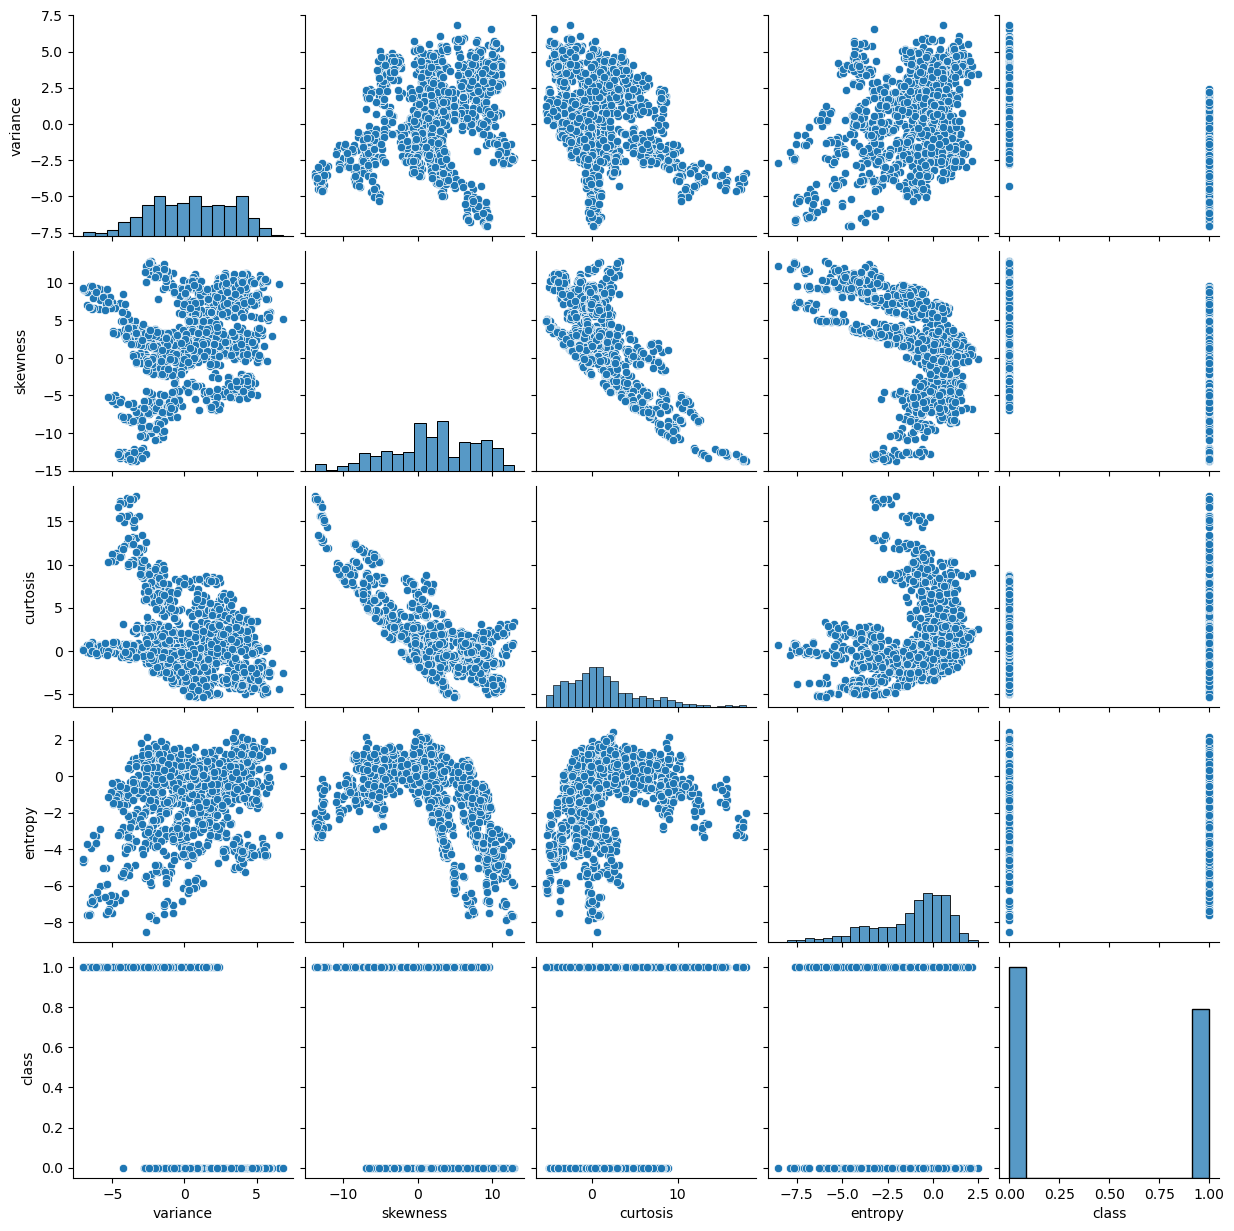

In [8]:
sns.pairplot(notes_df)

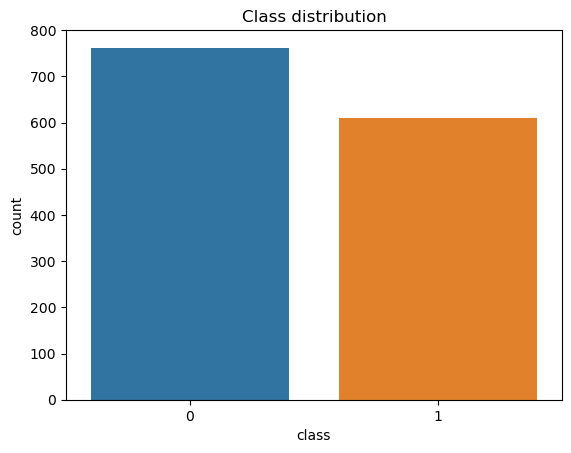

In [9]:
# Let us display class distribution

sns.countplot(x='class', data=notes_df)
plt.title('Class distribution')
plt.show()

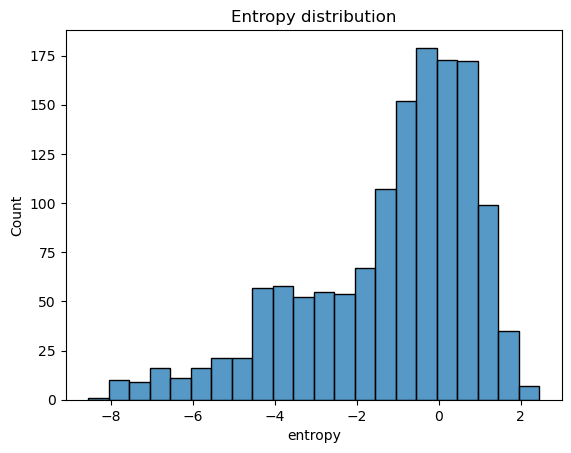

In [10]:
sns.histplot(x='entropy', data=notes_df)
plt.title('Entropy distribution')
plt.show()

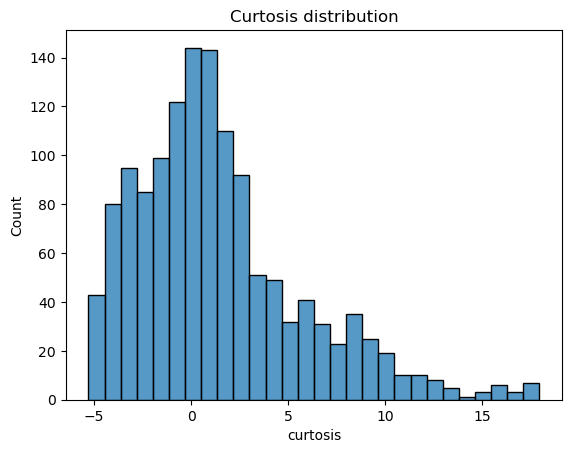

In [11]:
sns.histplot(x='curtosis', data=notes_df)
plt.title('Curtosis distribution')
plt.show()

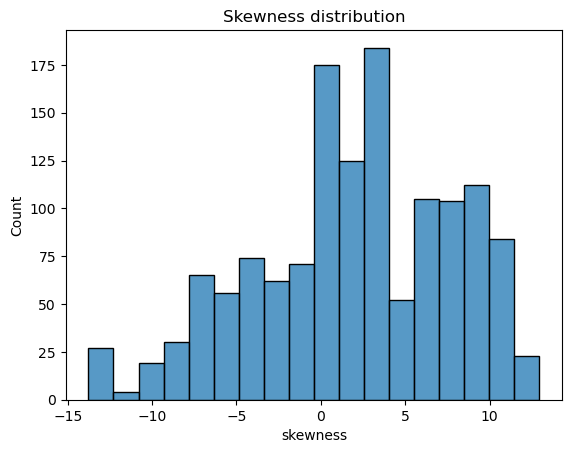

In [12]:
sns.histplot(x='skewness', data=notes_df)
plt.title('Skewness distribution')
plt.show()

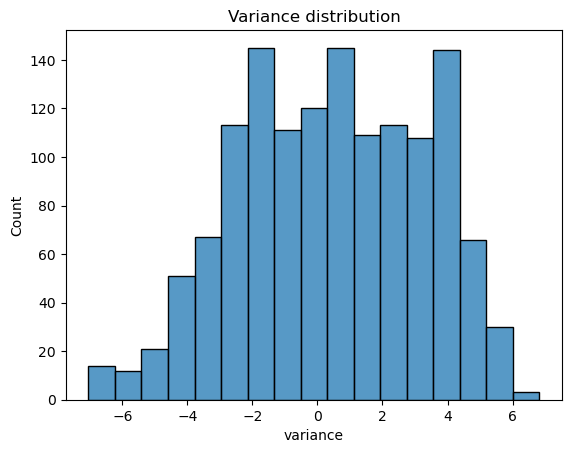

In [13]:
sns.histplot(x='variance', data=notes_df)
plt.title('Variance distribution')
plt.show()

# Split the dataset into train and test

In [14]:
# Put feature variables into X

X = notes_df.drop(['class'], axis=1)

In [15]:
# Put target variable to y

y = notes_df['class']

In [16]:
#Split the dataset into train and test based on the 80-20 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Logistic Regression

In [17]:
# Instantiate Logistic Regression and fit it.

lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [18]:
y_pred = lr.predict(X_test)

In [19]:
accuracy_score(y_test,y_pred)

0.9927272727272727

In [20]:
precision_score(y_test,y_pred)

0.9915254237288136

In [21]:
recall_score(y_test,y_pred)

0.9915254237288136

In [22]:
f1_score(y_test,y_pred)

0.9915254237288136

In [23]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[156   1]
 [  1 117]]


# KNN model

In [28]:
# Train the KNN model

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [29]:
y_pred2 = lr.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred2)

0.9927272727272727

In [31]:
precision_score(y_test,y_pred2)

0.9915254237288136

In [32]:
recall_score(y_test,y_pred2)

0.9915254237288136

In [33]:
f1_score(y_test,y_pred2)

0.9915254237288136

In [34]:
cm = confusion_matrix(y_test,y_pred2)
print(cm)

[[156   1]
 [  1 117]]
